# Module 14: Natural Language Processing I

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

We've covered about all the core basics of Python and are now solidly into how we wield these tools in the realm of data science. One extremely common, almost unavoidable application is text processing. It's a messy, complex, but very rewarding subarea that has reams of literature devoted to it, whereas we have this single lecture. By the end of this lecture, you should be able to:

 - Differentiate structured from unstructured data
 - Understand the different string parsing tools available through Python
 - Grasp some of the basic preprocessing steps required when text is involved
 - Define the "bag of words" text representation

## Part 1: Text Preprocessing

"Preprocessing" is something of a recursively ambiguous: it's the processing before the processing (what?).

More colloquially, it's the processing that you do in order to put your data in a useful format for the *actual* analysis you intend to perform. As we saw in the previous lecture, this is what data scientists spend the majority of their time doing, so it's important to know and understand the basic steps.

The vast majority of interesting data is in *unstructured* format. You can think of this kind of like data in its natural habitat. Like wild animals, though, data in unstructured form requires significantly more effort to study effectively.

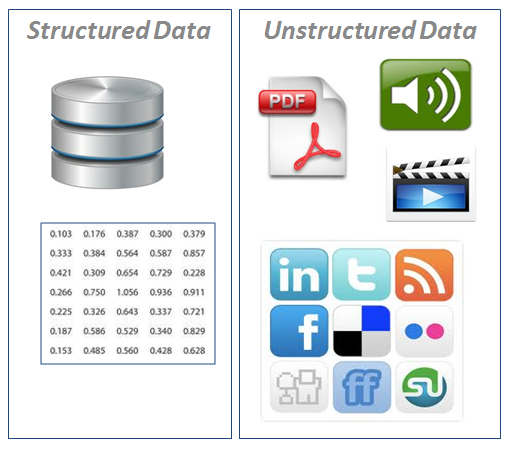

Our goal in preprocessing is, in a sense, to turn *unstructured* data into *structured* data, or data that has a logical flow and format.

To start, let's go back to the *Alice in Wonderland* example from the previous lecture ([you can download the text version of the book here](http://www.gutenberg.org/cache/epub/11/pg11.txt)).

In [1]:
book = None
try:  # Good coding practices!
    f = open("alice.txt", "r")
    book = f.read()
except FileNotFoundError:
    print("Could not find alice.txt.")
else:
    f.close()
    print(book[:71])  # Print the first 71 characters.

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Le


Recalling the mechanics of file I/O, you'll see we opened up a file descriptor to `alice.txt` and read the whole file in a single go, storing all the text as a single string `book`. We then closed the file descriptor and printed out the first line (or first 71 characters), while wrapping the entire operation in a try / except block.

But as we saw before, it's also pretty convenient to split up a large text file by lines. You could use the `readlines()` method instead, but you can take a string and split it up into a list of strings as well.

In [2]:
print(type(book))
lines = book.split("\n")  # Split the string. Where should the splits happen? On newline characters, of course.
print(type(lines))

<class 'str'>
<class 'list'>


*voilà!* `lines` is now a list of strings.

In [3]:
print(len(lines))

3736


...a list of over 3,700 lines of text, no less o_O

### Newline characters

Let's go over this point in a little more detail.

A "newline" character is an actual character--like "a" or "b" or "1" or ":"--that represents pressing the "enter" key. However, like tabs and spaces, this character falls under the category of a "whitespace" character, meaning that in print you can't actually *see* it.

But when in programming languages like Python (and Java, and C, and Matlab, and R, and and and...), they need a way to explicitly represent these whitespace characters, especially when processing text like we're doing right now.

So, even though you can't see tabs or newlines in the actual text--go ahead and open up *Alice in Wonderland* and tell me if you can see the actual characters representing newlines and tabs--you *can* see these characters in Python.

 - Tabs are represented by a backslash followed by the letter "t", the whole thing in quotes: `"\t"`
 - Newlines are represented by a backslash followed by the letter "n", the whole thing in quotes: `"\n"`

"But wait!" you say, "Slash-t and slash-n are two characters each, not one!

Yes, it's weird. If you build a career in text processing, you'll find the backslash has a long and storied history as a kind of "meta"-character, in that it tells whatever programming language that the character *after* it is a super-special snowflake. So in some sense, the backslash-t and backslash-n constructs are actually **one** character, because the backslash is the text equivalent of a formal introduction.

### Back to text parsing

When we called `split()` on the string holding the entire *Alice in Wonderland* book, we passed in the argument `"\n"`, which is the newline character. In doing so, we instructed Python to

 - *Split up* the original string (hence, the name of the function) into a list of strings

 - The end of one list and the beginning of the next list would be delimited by the occurrence of a newline character `"\n"` in the original string. In a sense, we're treating the book as a "newline-delimited" format

 - Return a list of strings, where each string is one line of the book

An important distinction for text processing neophytes: this splits the book up on a *line by line* basis, **NOT** a *sentence by sentence* basis. There are a lot of implicit language assumptions we hold from a lifetime of taking our native language for granted, but which Python has absolutely no understanding of beyond what we tell it to do.

You certainly could, in theory, split the book on punctuation, rather than newlines. This is a bit trickier to do without regular expressions (see Part 3), but to give an example of splitting by period:

In [4]:
sentences = book.split(".") # Splitting the book string on each period
print(sentences[0]) # The first chunk of text up to the first period

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever


You can already see some problems with this approach: not all sentences end with periods.

Sure, you could split things again on question marks and exclamation points, but this still wouldn't tease out the case of the title--which has NO punctuation to speak of!--and doesn't account for important literary devices like semicolons and parentheses.

These are valid punctuation characters in English! But how would you handle them?

### Cleaning up trailing whitespace

You may have noticed that, whenever you invoke the `print()` statement, you automatically get a new line even though I doubt you've ever added a `"\n"` to the end of the string you're printing.

In [5]:
print("Even though there's no newline in the string I wrote, Python's print function still adds one.")
print()  # Blank line!
print("There's a blank line above.")

Even though there's no newline in the string I wrote, Python's print function still adds one.

There's a blank line above.


This is fine for 99% of cases, except when the string already happens to have a newline at the end.

In [6]:
print("Here's a string with an explicit newline --> \n")
print()
print("Now there are TWO blank lines above!")

Here's a string with an explicit newline --> 


Now there are TWO blank lines above!


"But wait!" you say again, "You read in the text file and split it on newlines a few slides ago, but when you printed out the first line, there was no extra blank line underneath! Why did that work today but not in previous lectures?"

An excellent question. It has to do with the approach we took. Previously, we used the `readline()` method, which hands you back one line of text at a time *with the trailing newline intact*:

In [7]:
readlines = None
try:
    with open("alice.txt", "r") as f:
        readlines = f.readlines()
except:
    print("Something went wrong.")
print(readlines[0])
print(readlines[2])
print("There are blank lines because of the trailing newline characters.")

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with

There are blank lines because of the trailing newline characters.


On the other hand, when you call `split()` on a string, it not only identifies all the instances of the character you specify as the endpoints of each successive list, but it also *removes those characters* from the ensuing lists.

In [8]:
print(readlines[0])  # This used readlines(), so it STILL HAS trailing newlines.
print(lines[0])      # This used split(), so the newlines were REMOVED.
print("No trailing newline when using split()!")

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll
No trailing newline when using split()!


Is this getting confusing? If so, just remember the following: 

**Unless you have a compelling reason to keep newline characters, make liberal use of the `strip()` function for strings you read in from files.**

This function *strips* (hence, the name) any whitespace off the front AND end of a string. So in the following example:

In [9]:
# Notice this variable has LOTS of whitespace--tabs, spaces, newlines
trailing_whitespace = "       \t   this is the important part \n \n    \t "

# Now we string it
no_whitespace = trailing_whitespace.strip()

# And print it out between two vertical bars to show whitespace is gone
print("Border --> |{}| <-- Border".format(no_whitespace))

Border --> |this is the important part| <-- Border


All the pesky spaces, tabs, and newlines have been stripped off the string. This is *extremely* useful and pretty much a must when you're preprocessing text.

### Capitalization

This is one of those insidious that seems like such a tiny detail but can radically alter your analysis if left unnoticed: developing a strategy for how you're going to handle uppercase versus lowercase. 

We saw this before with that homework question with a "case-insensitive" substring search: the way you make Python ignore case differences is by converting *everything to the same case*. However, this can hide important factors like proper nouns.

Take the following example from *Alice in Wonderland*, line 216:

In [11]:
print(lines[216])

And so it was indeed: she was now only ten inches high, and her face


You'll notice the word "and" appears twice. It's the same word, but given their difference in capitalization, it's entirely likely that your analysis framework would treat those as *two separate words*. After all, `"and" != "And"`. Go ahead and try!

A common strategy is to simply lowercase *everything*. Yes, you likely lose a little bit of information, as it becomes more difficult to identify proper nouns, but a significant source of confusion--is it a proper noun, or just the start of a sentence? has the meaning of the word changed if it's in lowercase versus ALL CAPS? what if you're comparing multiple styles of writing and the authors use different literary forms of capitalizatoin?--is removed entirely.

You can do this with the Python string's **`lower()`** method:

In [11]:
print(lines[0])
title = lines[0].lower()
print(title)

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll
﻿project gutenberg's alice's adventures in wonderland, by lewis carroll


Now everything is, in some sense, "equivalent."

## Part 2: The "Bag of Words"

The "[bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model)" model is one of the most popular ways of representing a large collection of text, and one of the easiest ways to structure text.

The "bag of words" on display on the 8th floor of the Computer Science building at Carnegie Mellon University:

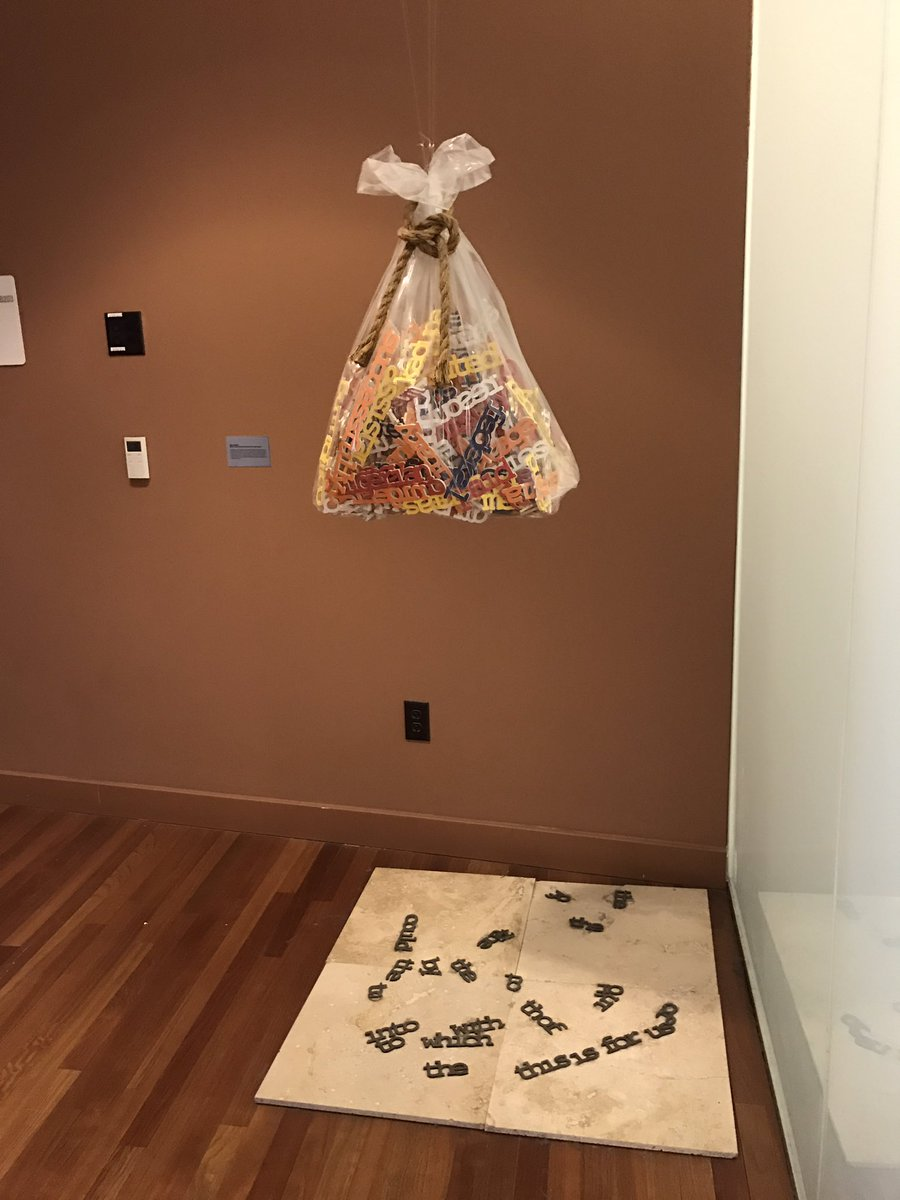

When using this model, the implicit assumptions behind it are saying

 - Relative word order and grammar **DON'T MATTER** to the overall meaning of the text.

 - Relative word frequencies **ABSOLUTELY MATTER** to the overall meaning of the text.

Formally, the bag of words is a "multiset", but you can think of it like a Python dictionary. In fact, at its simplest, that's all the bag of words is: a count of how many times each word occurs in your text. But like dictionaries, ordering no longer matters.

To illustrate, let's go ahead and design a word counter for *Alice in Wonderland*! First, we'll initialize our dictionary of counts. To make our lives easier, we'll use a `defaultdict`, a special kind of dictionary you can use when you want automatic default values enforced for keys that don't exist.

In [2]:
from collections import defaultdict
word_counts = defaultdict(int)  # All values are integers.

0


It otherwise behaves exactly like a regular Python dictionary, except we won't get a `KeyError` if we reference a key that doesn't exist; instead, a new key will be automatically created and a default value set. For the `int` type, this default value is 0.

`setdefault(key[, default])` can be used as an alternative to use the legendary python dictionary.

If key is in the dictionary, return its value. If not, insert key with a value of default and return default. default defaults to None.

Next, we'll iterate through the lines of the book. There are a couple things we need to do here:

 - For each line, split the line into single words. We'll go back yet again to our good friend `split()`.

 - Now we'll have a list of words, so we'll need to iterate over these words, lowercasing them all and then adding them up.

So the code should look something like this:

In [13]:
for line in lines:  # Iterate through the lines of the book
    words = line.split()  # If you don't give split() any arguments, the *default* split character is ANY whitespace.
    for word in words:
        w = word.lower()  # Convert to lowercase.
        word_counts[w] += 1  # Add 1 to the count for that word in our word dictionary.
        ### This last line above will CRASH with regular Python dictionaries! Why???

Let's take a look at what we have! First, we'll count how many unique words there are.

In [14]:
print("Unique words: {}".format(len(word_counts.keys())))

Unique words: 5581


Next, we'll count the *total* number of words in the book.

In [15]:
print("Total words: {}".format(sum(word_counts.values())))

Total words: 29461


Now we'll find the word that occurred most often:

In [16]:
maxcount = -1
maxitem = None
for k, v in word_counts.items():
    if v > maxcount:
        maxcount = v
        maxitem = k
print("'{}' occurred most often ({} times).".format(maxitem, maxcount))

'the' occurred most often (1777 times).


Well, there's a shocker. */sarcasm*

Python has another incredibly useful utility class for whenever we're counting things: a `Counter`! This will let us easily find the *n* words with the highest counts.

In [17]:
from collections import Counter
counts = Counter(word_counts) # Counter takes a dictionary as input
print(counts.most_common(20))  # Find the 20 words with the highest counts!

[('the', 1777), ('and', 833), ('to', 782), ('a', 670), ('of', 610), ('she', 518), ('said', 421), ('in', 412), ('it', 374), ('was', 334), ('you', 332), ('i', 260), ('as', 258), ('that', 237), ('alice', 221), ('at', 220), ('with', 217), ('her', 208), ('had', 176), ('all', 173)]


Pretty boring, right? Most of these words are referred to as *stop words*, or words that used pretty much in every context and therefore don't tell you anything particularly interesting. They're usually filtered out, but [because of some interesting corner cases](https://en.wikipedia.org/wiki/Stop_words), there's no universal "stop word list"; it's generally up to you to decide what words to remove (though pretty much all of the above top 20, with the exception of "alice", can be removed).

So, in addition to stripping out and splitting on whitespace, and lowercasing all the words, we also check if the word is part of some pre-built stop-word list. If it is, just throw it out; if not, then we'll count it.

## Part 3: String Formatting

We've seen previously how to convert strings and numbers (integers and floating-point values) back and forth; just using the `str()`, `int()`, and `float()` functions. Pretty easy.

Here's a harder question: how do you represent a floating-point number as a string, but to only 2 decimal places?

Another hard question: how do you represent an integer as string, but with 3 leading zeros?

You've probably noticed the bizarre notation I've used when printing out strings.

In [18]:
print("Here's the notation --> {}".format("another string"))

Here's the notation --> another string


By using the curly braces `{}` *inside* the string, this creates a placeholder for another string to be inserted. That other string is the argument(s) to the `format()` function.

But there's a lot more to the curly braces than just `{}`.

The simplest is just using the curly braces and nothing else. If you specify multiple pairs of curly braces, you'll need to specify an equal number of arguments to `format()`, and they'll be inserted into the string in the order you gave them to `format()`.

In [19]:
print("{}, {}, and {}".format("a", "b", "c"))

a, b, and c


Alternatively, you can specify the indices of the `format()` arguments inside the curly braces:

In [20]:
print("{0}, {2}, and {1}".format("a", "b", "c"))

a, c, and b


Notice the 2nd and 3rd arguments were flipped in their final ordering!

You can even provide arbitrary named arguments inside the curly braces, which `format()` will then expect.

In [21]:
print("{first_arg}, {second_arg}, and {third_arg}".format(second_arg = "b", first_arg = "a", third_arg = "c"))

a, b, and c


### Leading zeros and decimal precision

You can also use this same syntax to specify leading zeros and decimal precision, but the notation gets a little more complicated.

You'll need to first enter a colon ":", followed by the number 0, followed by the number of *places* that should be counted:

In [22]:
print("One leading zero: {:02}".format(1)) # A "1" with 2 digits
print("Two leading zeros: {:03}".format(1)) # A "1" with 3 digits 
print("One leading zero: {:04}".format(100)) # A "100" with 4 digits
print("Two leading zeros: {:05}".format(100)) # A "100" with 5 digits

One leading zero: 01
Two leading zeros: 001
One leading zero: 0100
Two leading zeros: 00100


Decimal precision is very similar, but instead of a 0, you'll specify a decimal point "." followed by the level of precision you want (a number), followed by the letter "f" to signify that it's a floating-point:

In [5]:
import numpy as np
print("Unformatted: {}".format(np.pi))
print("Two decimal places: {:.2f}".format(np.pi))

Unformatted: 3.141592653589793
Two decimal places: 3.14159


You can also include the comma in large numbers so you can actually read them more easily:

In [24]:
big_number = 98483745834
print("Big number: {}".format(big_number))
print("Big number with commas: {:,}".format(big_number))

Big number: 98483745834
Big number with commas: 98,483,745,834


You can fill a string with spaces to the left or right so the full output occupies a specifict width.

In [6]:
message = 'Hi there'
# With spaces to the left
print(f'The message with spaces is:{message:>10}.')
# With spaces to the right
print(f'The message with spaces is:{message:<10}.')
# Without spaces
print(f'The message without spaces is:{message}.')

The message with spaces is:  Hi there.
The message with spaces is:Hi there  .
The message without spaces is:Hi there.


### Additional string functions

There is an entire ecosystem of [Python string functions](https://docs.python.org/3.5/library/stdtypes.html#string-methods) that I highly encourage you to investigate, but I'll go over a few of the most common here.

`upper()` and `lower()`: we've seen the latter already, but the former can be just as useful.

`count()` will give you the number of times a *substring* occurs in the actual string. If you're interested in one word in particular, this can be a very efficient way of finding it:

In [25]:
count_of_word = book.count("Wonderland")
print("'Wonderland' occurs {} times.".format(count_of_word))

'Wonderland' occurs 5 times.


What if you need to find the actual location in a string of that substring? As in, where is "Wonderland" first mentioned in the book?

`find()` to the rescue!

In [26]:
word_position = book.find("Wonderland")
print("'Wonderland' is first found {} characters in.".format(word_position))

'Wonderland' is first found 43 characters in.


...well, that's embarrassing; that's probably the "Wonderland" that's in the book title. How about the *second* occurrence, then? We can use the index of the first one to tell `find()` that we want to *start* looking from there.

In [27]:
second_word_position = book.find("Wonderland", 43 + 1) # Start at index 43+1; as in, 1 position AFTER the first occurrence of the word
print("'Wonderland' is found {} characters in.".format(second_word_position))

'Wonderland' is found 353 characters in.


Now, I've decided I don't want this book to be *Alice in Wonderland*, but rather *Alice in Las Vegas*! How can I make this happen? `replace()`!

In [28]:
my_book = book.replace("Wonderland", "Las Vegas")  # Replace the 1st thing with the 2nd thing
print(my_book[:71])

﻿Project Gutenberg's Alice's Adventures in Las Vegas, by Lewis Carroll



Two more very useful string functions are `startswith()` and `endswith()`. These are great if you're testing for leading or trailing characters or words.

In [29]:
print(lines[8])  # The 8th (really, 9th) line of the book

Title: Alice's Adventures in Wonderland


In [30]:
print(lines[8].startswith("Title"))  # Does this line start with "Title"?

True


In [31]:
print(lines[8].endswith("Saturn")) # Does this line end with "Saturn"?

False


Finally, the `join()` method. This is a little tricky to use, but insanely useful. It's cropped up on a couple previous assignments.

You'll want to use this method whenever you have a list of strings that you want to "glue" together into a single string. Perhaps you have a list of words and want to put them back together into a sentence!

In [32]:
words = lines[8].split(" ") # Split the line on whitespace
print(words)

['Title:', "Alice's", 'Adventures', 'in', 'Wonderland']


We can do this by specifying first the character we want to put in between all the words we're joining--in this case, just a space character--then calling `join()` on that character, and passing in the list of words we want to glue together as the argument to the function.

In [33]:
between_char = " " # The "glue" between each word
sentence = between_char.join(words) # Join the list of words using the "glue"
print(sentence) # The full sentence is back!

Title: Alice's Adventures in Wonderland


## Review Questions

Some questions to discuss and consider:

1: Provide at least three examples of unstructured text data. What could be done to structure these data?

2: Recall in the lecture when we computed the number of unique words in *Alice in Wonderland*. That number we got is actually **artificially high**. Can you explain why? How can we fix this? (hint: think about what we *didn't* strip off lines and words)

3: Can you think of any weaknesses in the bag-of-words model? How could you potentially mitigate these weaknesses? (hint: instead of splitting by *word*...)

4: I want to know how many times the word "Alice" is the first word of a sentence in *Alice in Wonderland*. Assuming the book has already been read into Python as a single string, describe the steps (in English or pseudocode) required to obtain this number.


## Additional Resources

 1. Grus, Joel. *Data Science from Scratch*, Chapter 9. 2015. ISBN-13: 978-1491901427
 2. Saha, Amit. *Doing Math with Python*, Chapter 3. 2015. ISBN-13: 978-1593276409
 3. *Alice in Wonderland*, by Lewis Carroll. Project Gutenburg. http://www.gutenberg.org/cache/epub/11/pg11.txt